<a href="https://colab.research.google.com/github/obielin/Palestine_News_Analysis/blob/main/Israeli_Palestine_News_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#News Data Analysis and Visualization
This notebook is designed to perform a comprehensive analysis of a Isreali Palestine news dataset stored. We start by mounting the Google Drive to access the dataset, followed by loading the dataset into a Pandas DataFrame for manipulation and analysis. Our primary goals are to understand the dataset's structure, clean the data, and conduct various analyses to extract insights from the news data. These insights include temporal trends, word count analysis, stop word frequency analysis, and URL count analysis. Finally, we clean the text data to prepare it for further natural language processing tasks.

### Setting up the environment
This section mounts the Google Drive to the Colab environment, allowing us to access the dataset stored in Google Drive directly and importing all packages needed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from collections import Counter
import re
import warnings
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Loading the Dataset
We load the news dataset from the specified path into a Pandas DataFrame and display the first five rows to get an initial understanding of the data.

In [ ]:
#Loading the dataset
file_path = "/content/drive/MyDrive/news_data.csv"
df= pd.read_csv(file_path)
df.head(5)

,headline,description,date
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,23-12-2023
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,23-12-2023
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,23-12-2023
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023


### Preliminary Data Analysis
Before indepth analysis of the data, we perform some preliminary analysis to understand its structure and quality:

Use df.info() and print(df.shape) to obtain the dataset's size, shape, and datatype information.
Check for missing values across all columns using df.isna().sum().

In [ ]:
#Let's get a fundamental understanding of the data's size, shape, and structure
# Obtain the shape of the data
df.info()
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     3338 non-null   object
 1   description  3338 non-null   object
 2   date         3338 non-null   object
dtypes: object(3)
memory usage: 78.4+ KB
(3338, 3)


In [ ]:
#check for missing values in the dataset
df.isna().sum()

headline       0
description    0
date           0
dtype: int64

### Temporal Analysis
We convert the date column to datetime format and sort the dataset by date to perform temporal analysis. A line chart is generated to visualize the count of headlines over time, highlighting trends and patterns in news activity.

In [ ]:
import plotly.express as px

# Perform temporal analysis to highlight trends over time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

fig = px.line(df, x='date', y=range(len(df)), markers=True)
fig.update_traces(mode='lines+markers', hovertemplate='%{y} headlines<br>%{x|%Y-%m-%d}')
fig.update_layout(
    title='Headline Count Over Time',
    xaxis_title='Date',
    yaxis_title='Count',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    width=1000,  # Adjust the width as needed
    height=600   # Adjust the height as needed
)

fig.show()


### Word Count Analysis
Using custom functions, we calculate the word count for headlines and descriptions, respectively. Bar plots are created to visualize the distribution of word counts, providing insights into the content's verbosity.

In [ ]:
import plotly.express as px

# Custom function to count words in a text column
def count_words(text):
    words = text.split()
    return len(words)

# Calculate word counts
df['headline_word_count'] = df['headline'].apply(count_words)
df['description_word_count'] = df['description'].apply(count_words)

# Create interactive bar plots with green and blue colors and hover information using Plotly Express
fig1 = px.bar(df, x=df.index, y='headline_word_count', color_discrete_sequence=['blue'], labels={'index': 'Sample Index'}, title='Word Count Analysis for Headlines')
fig1.update_traces(text=df['headline_word_count'], textposition='outside', hoverinfo='x+y')

fig2 = px.bar(df, x=df.index, y='description_word_count', color_discrete_sequence=['green'], labels={'index': 'Sample Index'}, title='Word Count Analysis for Descriptions')
fig2.update_traces(text=df['description_word_count'], textposition='outside', hoverinfo='x+y')

# Set the size of the plots
fig1.update_layout(width=1000, height=800)
fig2.update_layout(width=1000, height=800)

# Show interactive plots
fig1.show()
fig2.show()


### Stop Word Analysis
We analyze the stop words in the news descriptions by counting and extracting them. This analysis helps us understand the common filler words used in news content, which can be crucial for text preprocessing in natural language processing (NLP) applications.

In [ ]:
# Ensure NLTK Stopwords are downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

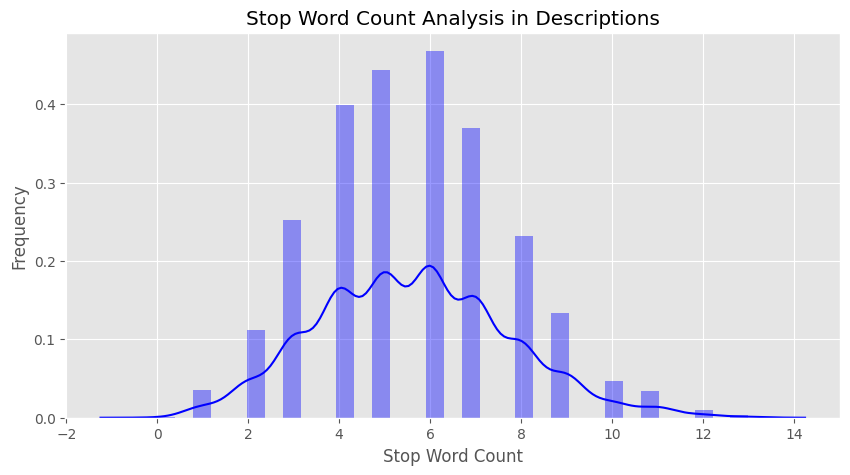

In [ ]:
# Function to count stop words in a text sample
def count_stop_words(data):
    stop_words = set(stopwords.words('english'))
    words = data.split()
    return sum(1 for word in words if word.lower() in stop_words)

def plot_count(stop_word_counts, title, subtitle):
    plt.figure(figsize=(10, 5))
    sns.distplot(stop_word_counts, color='Blue')
    plt.title(subtitle)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_count(df['stop_word_count'], 'Stop Word Count', 'Stop Word Count Analysis in Descriptions')

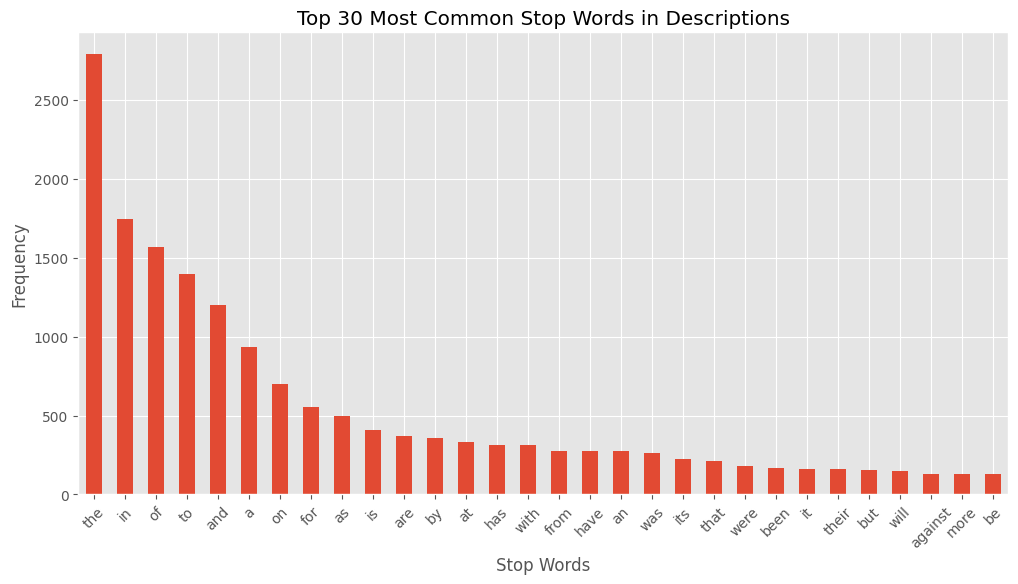

In [ ]:
# Function to extract stop words from a text sample
def extract_stop_words(data):
    stop_words = set(stopwords.words('english'))
    words = data.split()
    return [word.lower() for word in words if word.lower() in stop_words]


# Extracting stop words from each description
all_stop_words = df['description'].apply(extract_stop_words).explode()

# Counting the occurrences of each stop word
stop_word_counts = all_stop_words.value_counts()

# Selecting the top 30 stop words
top_30_stop_words = stop_word_counts.head(30)

# Plotting
plt.figure(figsize=(12, 6))
top_30_stop_words.plot(kind='bar')
plt.title('Top 30 Most Common Stop Words in Descriptions')
plt.ylabel('Frequency')
plt.xlabel('Stop Words')
plt.xticks(rotation=45)
plt.show()

### URL Count and Text Cleaning
Count URLs in the descriptions to quantify external references in the news content.
Clean the text data by removing special characters, HTML tags, and stop words, and converting the text to lowercase. This step is vital for preparing the data for further NLP tasks.

In [ ]:
# Function to count URLs in a text string
def count_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return len(re.findall(url_pattern, text))

# Apply the function to each row in the 'description' column
df['url_count'] = df['description'].apply(count_urls)


# Display the DataFrame
print(df)

                                               headline  \
3337  Pho­tos: Fears over Al-Aqsa stained-glass win­...   
3336                               The War in June 1967   
3145  Pales­tine and the UN’s ‘re­spon­si­bil­i­ty t...   
3142  Fear bar­ri­er bro­ken de­spite hun­dreds of a...   
3144  Is­rael rolls back gen­er­al’s com­ments on bo...   
...                                                 ...   
4     Is­raeli forces con­tin­ue at­tacks amid crit­...   
3     US ac­cus­es Iran of be­ing ‘deeply in­volved’...   
2     Is­rael’s war on Gaza: List of key events, day 78   
1     Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...   
0     Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...   

                                            description       date  \
3337  Is­raeli raids at the Al-Aqsa Mosque com­pound... 2014-03-10   
3336  The June 1967 Arab-Is­raeli war last­ed only s... 2017-02-06   
3145  Un­der its P2P doc­trine, the UN must de­ploy ... 2021-01-06   
3142  Is­ra

### Define the Text cleaning Function and apply it to the data frame
The clean_text function is designed to preprocess the text by performing several cleaning steps, which are crucial for preparing the data for natural language processing (NLP) tasks.

In [ ]:
# Define a function to clean text
def clean_text(text):
    # Replace '&' with 'and'
    text = re.sub(r'&', 'and', text)

    # Remove punctuations
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove HTML syntaxes
    text = re.sub(r'<.*?>', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Convert to lowercase
    text = ' '.join(filtered_words).lower()
    return text


# Apply the clean_text function to both 'review_title' and 'review_text' columns
df['description'] = df['description'].apply(clean_text)

In [ ]:
df.head(5)

,headline,description,date,headline_word_count,description_word_count,stop_word_count,url_count
3337,Pho­tos: Fears over Al-Aqsa stained-glass win­...,israeli raids alaqsa mosque compound led windo...,2014-03-10,6,15,5,0
3336,The War in June 1967,june 1967 arabisraeli war lasted six days cons...,2017-02-06,5,20,6,0
3145,Pales­tine and the UN’s ‘re­spon­si­bil­i­ty t...,p2p doctrine un must deploy palestine protect ...,2021-01-06,8,18,5,0
3142,Fear bar­ri­er bro­ken de­spite hun­dreds of a...,israeli forces attempting reassert control pal...,2021-01-06,9,17,6,0
3144,Is­rael rolls back gen­er­al’s com­ments on bo...,benny gantz says military chief spoke figurati...,2021-01-06,10,15,2,0


### Saving the Cleaned Data
Finally, we save the cleaned dataset to a CSV file, making it ready for further analysis or machine learning applications.

In [ ]:
#save to csv
df.to_csv('cleaned_news_data.csv', index=False)